In [ ]:
# -*- coding: utf-8 -*-
"""Super|Unsuper.ipynb and Ensembled Model

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1QCPWks_ISEtvbJASWeTXEZX2mHj7J_KB
"""
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.cluster import KMeans
from sklearn.metrics import (
    roc_auc_score, roc_curve, confusion_matrix,
    recall_score, classification_report,
    accuracy_score, f1_score
)
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Additional imports for the second set of code
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")
data.head()


Mounted at /content/drive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

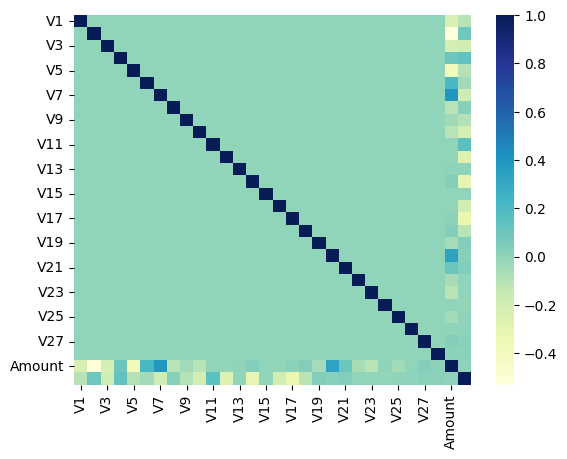

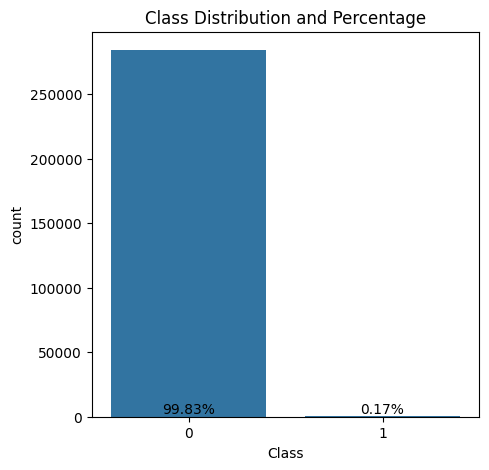

Counter({0: 284315, 1: 284315})


((454904, 29), (454904,))

In [ ]:

# Data preprocessing
data.isnull().sum()
data.drop("Time", axis=1, inplace=True)

# Explore data
data.info()
data.shape
data.describe()

# Correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu")
plt.show()

# Class distribution count plot
plt.figure(figsize=(5, 5))
sns.countplot(x="Class", data=data)
(data["Class"].value_counts() / len(data)) * 100

# Display the percentage distribution as text
class_distribution_percent = (data["Class"].value_counts() / len(data)) * 100
for index, value in class_distribution_percent.items():
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Show the plot
plt.title('Class Distribution and Percentage')
plt.show()

# Prepare data for modeling
X = data.drop("Class", axis=1)
y = data["Class"]

# Oversample using SMOTE
sm = SMOTE(random_state=2)
X, y = sm.fit_resample(X, y)
counter = Counter(y)
print(counter)

# Normalize features
scale = MinMaxScaler()
X = scale.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     56992
           1       0.98      0.93      0.96     56734

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



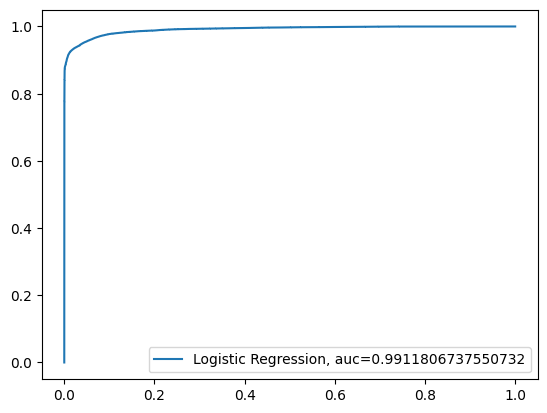

Confusion Matrix (Logistic Regression):
 [[56043   949]
 [ 4001 52733]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56992
           1       1.00      1.00      1.00     56734

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



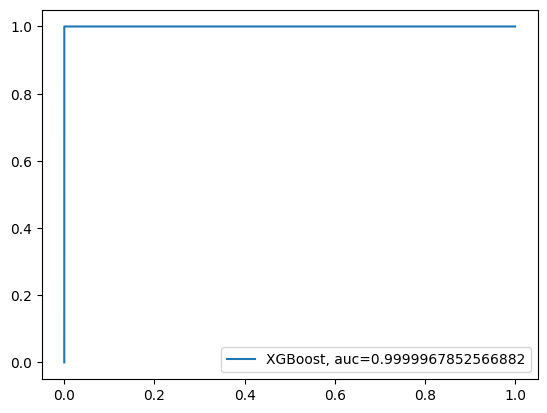

Confusion Matrix (XGBoost):
 [[56969    23]
 [    0 56734]]


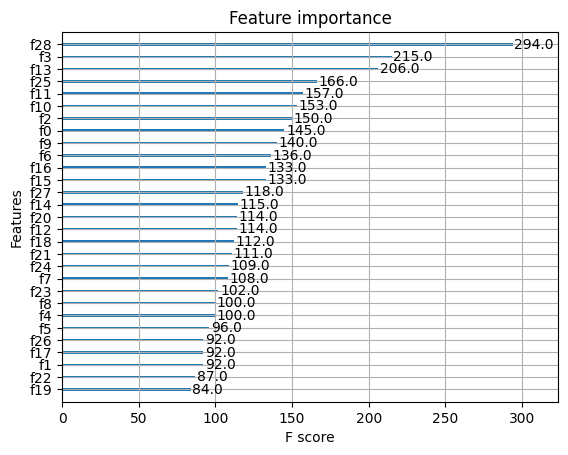

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56992
           1       1.00      1.00      1.00     56734

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



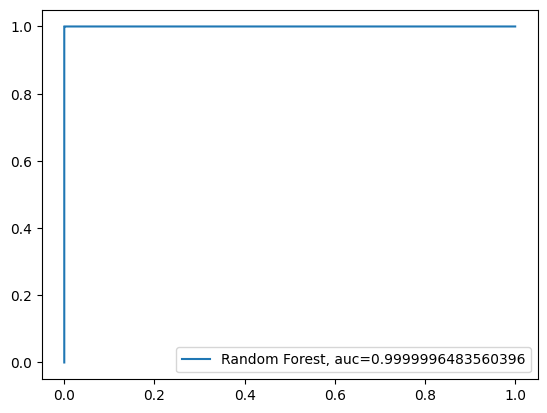

Confusion Matrix (Random Forest):
 [[56982    10]
 [    0 56734]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Clustering Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.79     56992
           1       1.00      0.48      0.65     56734

    accuracy                           0.74    113726
   macro avg       0.83      0.74      0.72    113726
weighted avg       0.83      0.74      0.72    113726

KMeans Clustering Anomaly Detection Report:
Distance to Center:
 [0.49363776 0.41417447 0.26764851 ... 0.40185187 0.64112813 0.20740207]
Anomaly Rate: 0.24008582030494346


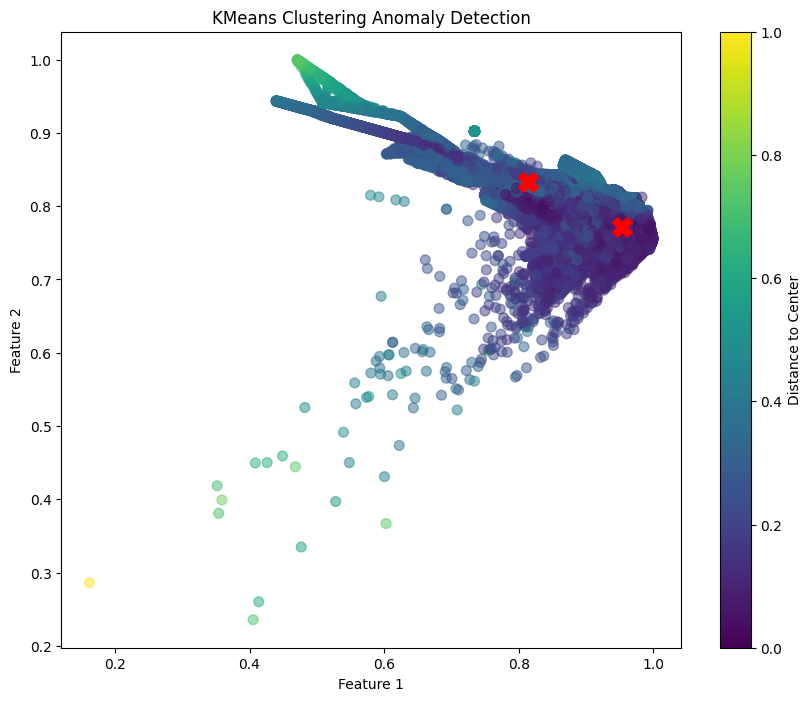

Isolation Forest Classification Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.67     56992
           1       0.99      0.02      0.03     56734

    accuracy                           0.51    113726
   macro avg       0.75      0.51      0.35    113726
weighted avg       0.75      0.51      0.35    113726

Confusion Matrix (Isolation Forest):
 [[56984     8]
 [55735   999]]
Isolation Forest Anomaly Detection Report:
Anomaly Scores:
 [0.23779591 0.19592256 0.23509105 ... 0.23494931 0.00470211 0.27473545]
Anomaly Rate: 0.00885461547930992


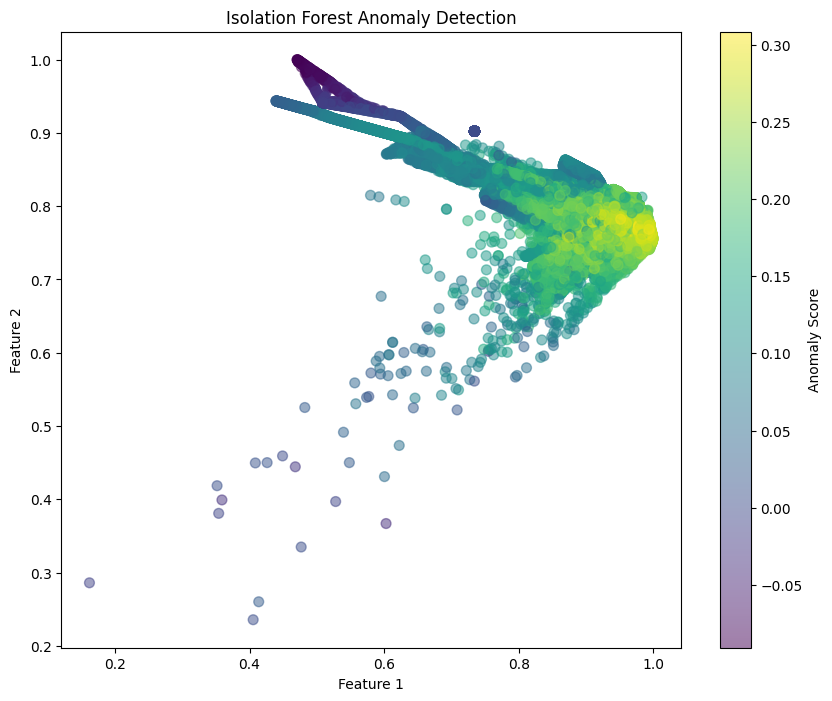

In [ ]:
# Supervised Model 1: Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluation and visualization
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# ROC Curve for Logistic Regression
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lr)
auc = roc_auc_score(y_test, y_pred_proba_lr)
plt.plot(fpr, tpr, label="Logistic Regression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Confusion Matrix for Logistic Regression
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix (Logistic Regression):\n", cf_matrix_lr)

# Save Logistic Regression model
pickle.dump(lr, open('lr_model (auc = 0.99).pkl', 'wb'))

# Supervised Model 2: XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Evaluation and visualization
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# ROC Curve for XGBoost
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgb)
auc = roc_auc_score(y_test, y_pred_proba_xgb)
plt.plot(fpr, tpr, label="XGBoost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Confusion Matrix for XGBoost
cf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost):\n", cf_matrix_xgb)

# Save XGBoost model
pickle.dump(xgb, open('xgb_model (auc = 0.99).pkl', 'wb'))

# Plot Feature Importances for XGBoost
plot_importance(xgb)
plt.show()

# Supervised Model 3: Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluation and visualization
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# ROC Curve for Random Forest
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
auc = roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr, tpr, label="Random Forest, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Confusion Matrix for Random Forest
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):\n", cf_matrix_rf)

# Save Random Forest model
pickle.dump(rf, open('rf_model (auc = 0.99).pkl', 'wb'))

# Unsupervised Model 1: KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Predictions and Evaluation
y_pred_kmeans = kmeans.predict(X_test)
print("KMeans Clustering Classification Report:\n", classification_report(y_test, y_pred_kmeans))


# Anomaly Detection for KMeans
distance_to_center_kmeans = np.min(kmeans.transform(X_test), axis=1)
anomaly_rate_kmeans = np.mean(y_pred_kmeans)

# Print and visualize anomalies for KMeans
print("KMeans Clustering Anomaly Detection Report:")
print("Distance to Center:\n", distance_to_center_kmeans)
print("Anomaly Rate:", anomaly_rate_kmeans)

# Visualization of KMeans Clustering Anomaly Detection
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=distance_to_center_kmeans, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title('KMeans Clustering Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Distance to Center')
plt.show()

# Unsupervised Model 2: Isolation Forest
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
isolation_forest.fit(X_train)

# Predictions and Evaluation
y_pred_iso_forest = isolation_forest.predict(X_test)
y_pred_iso_forest[y_pred_iso_forest == 1] = 0
y_pred_iso_forest[y_pred_iso_forest == -1] = 1

print("Isolation Forest Classification Report:\n", classification_report(y_test, y_pred_iso_forest))

# Confusion Matrix for Isolation Forest
cf_matrix_iso_forest = confusion_matrix(y_test, y_pred_iso_forest)
print("Confusion Matrix (Isolation Forest):\n", cf_matrix_iso_forest)



# Print and visualize anomalies for Isolation Forest
print("Isolation Forest Anomaly Detection Report:")
print("Anomaly Scores:\n", anomaly_scores_iso_forest)
print("Anomaly Rate:", anomaly_rate_iso_forest)

# Visualization of Isolation Forest Anomaly Detection
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=anomaly_scores_iso_forest, cmap='viridis', s=50, alpha=0.5)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Anomaly Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classification Report (Ensemble Model):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56959
           1       1.00      1.00      1.00     56767

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Accuracy (Ensemble Model): 0.9991558658530152
F1-score (Ensemble Model): 0.9991551526885506
Recall (Ensemble Model): 1.0


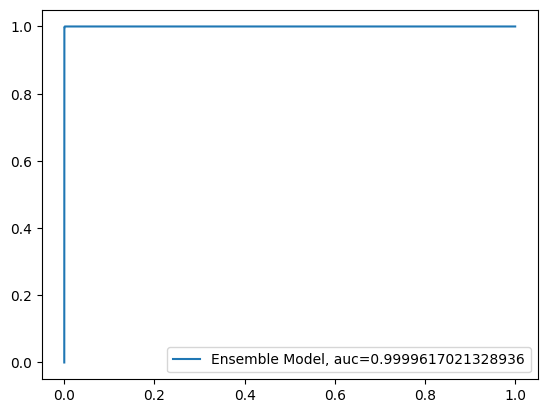

Confusion Matrix (Ensemble Model):
 [[56863    96]
 [    0 56767]]
Confusion Matrix (Ensemble Model):
 [[56863    96]
 [    0 56767]]


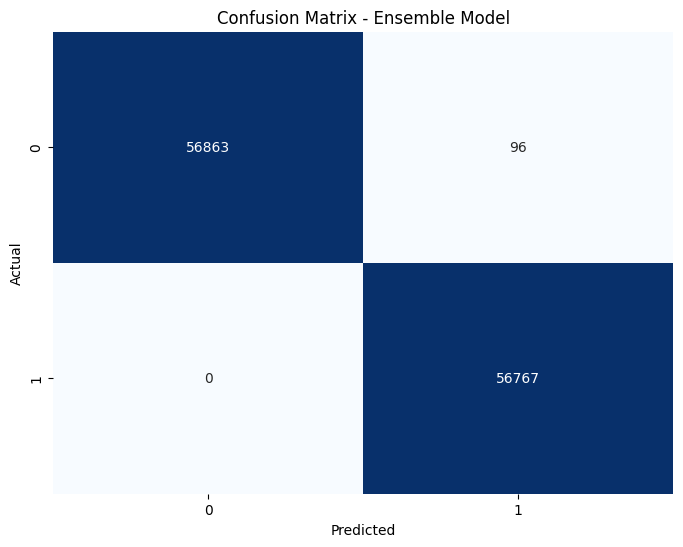

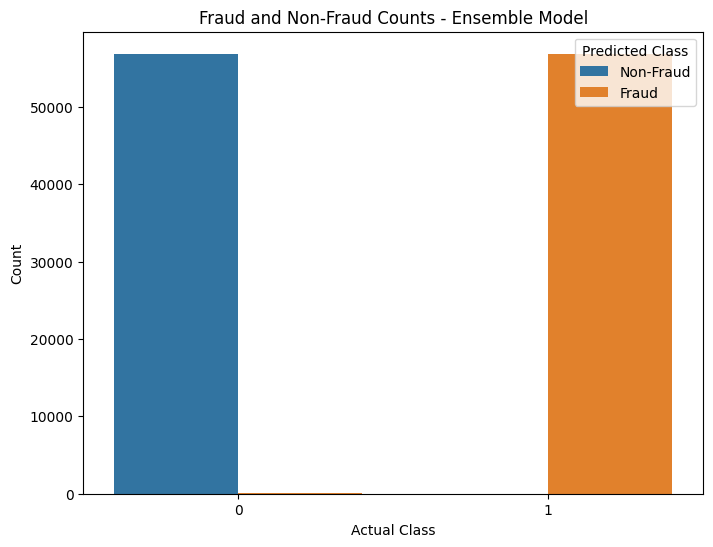

Ensemble Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56959
           1       1.00      1.00      1.00     56767

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



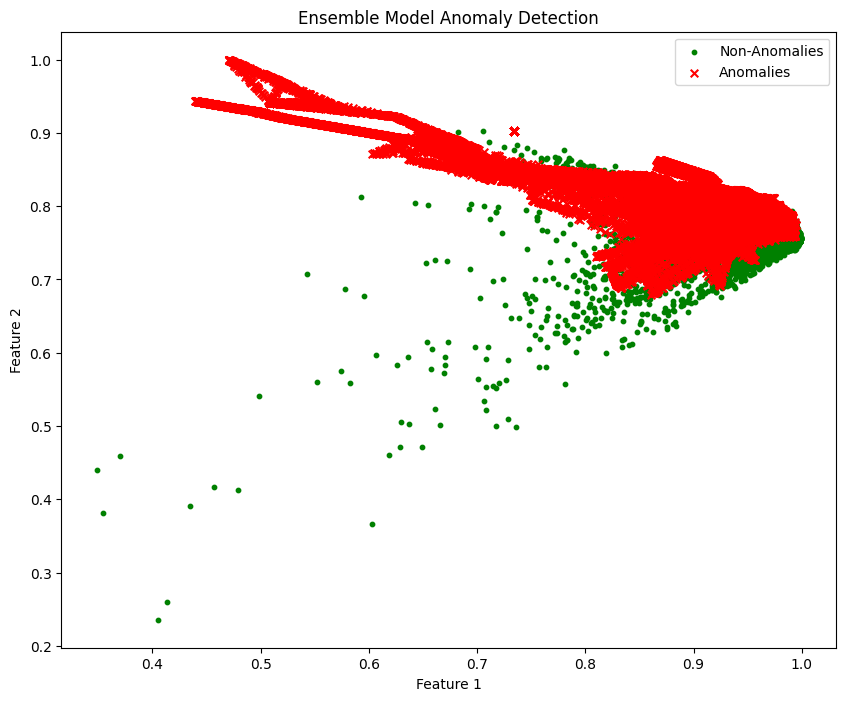

Anomaly Scores:
 [0.99016453 0.19233753 0.19100562 ... 0.97633299 0.94046655 0.77473999]
Anomaly Rate: 0.5


In [ ]:
# Custom Classifier for IsolationForest
class IsolationForestClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, contamination=0.01, random_state=None):
        self.contamination = contamination
        self.random_state = random_state
        self.isolation_forest = IsolationForest(contamination=self.contamination, random_state=self.random_state)

    def fit(self, X, y=None):
        self.isolation_forest.fit(X)
        return self

    def predict(self, X):
        # Convert IsolationForest output to binary predictions
        return np.where(self.isolation_forest.predict(X) == -1, 1, 0)

    def decision_function(self, X):
        # Return anomaly score as a decision function
        return -self.isolation_forest.decision_function(X)

    def predict_proba(self, X):
        # Simulate probabilities based on anomaly scores
        decision_function = self.decision_function(X)
        min_decision = np.min(decision_function)
        max_decision = np.max(decision_function)
        normalized_decision = (decision_function - min_decision) / (max_decision - min_decision)
        # Probability is the complement of the anomaly score
        probabilities = 1 - normalized_decision
        return np.column_stack([1 - probabilities, probabilities])

# Supervised Model 1: Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Supervised Model 2: XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Supervised Model 3: RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Unsupervised Model 1: KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_pipeline = Pipeline([
    ("kmeans", kmeans),
    ("classifier", DecisionTreeClassifier())  # Using a classifier, e.g., DecisionTreeClassifier
])

# Unsupervised Model 2: Isolation Forest
isolation_forest_classifier = IsolationForestClassifier(contamination=0.01, random_state=42)
# Hybrid Model: Ensemble of Logistic Regression, XGBoost, Random Forest, KMeans, Isolation Forest
ensemble_model = VotingClassifier(estimators=[
    ('logistic_regression', lr),
    ('xgboost', xgb),
    ('kmeans', kmeans_pipeline),
     ('random_forest', rf),
    ('isolation_forest', isolation_forest_classifier)
], voting='soft')

ensemble_model.fit(X_train, y_train)

# Predictions for the Ensemble Model
y_pred_ensemble = ensemble_model.predict(X_test)

# Classification Report for Ensemble Model
classification_rep = classification_report(y_test, y_pred_ensemble)
print("Classification Report (Ensemble Model):\n", classification_rep)

# Calculate Accuracy, F1-score, and Recall
accuracy = accuracy_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble)
recall = recall_score(y_test, y_pred_ensemble)

# Print Accuracy, F1-score, and Recall
print("Accuracy (Ensemble Model):", accuracy)
print("F1-score (Ensemble Model):", f1)
print("Recall (Ensemble Model):", recall)

# ROC Curve for Ensemble Model
y_pred_proba_ensemble = ensemble_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_ensemble)
auc = roc_auc_score(y_test, y_pred_proba_ensemble)
plt.plot(fpr, tpr, label="Ensemble Model, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Confusion Matrix for Ensemble Model
cf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print("Confusion Matrix (Ensemble Model):\n", cf_matrix_ensemble)

# Save Ensemble Model
pickle.dump(ensemble_model, open('ensemble_model.pkl', 'wb'))

# Confusion Matrix for Ensemble Model
cf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print("Confusion Matrix (Ensemble Model):\n", cf_matrix_ensemble)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_ensemble, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Ensemble Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Bar Plot for Fraud and Non-Fraud Counts
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, hue=y_pred_ensemble)
plt.title("Fraud and Non-Fraud Counts - Ensemble Model")
plt.xlabel("Actual Class")
plt.ylabel("Count")
plt.legend(title="Predicted Class", loc="upper right", labels=["Non-Fraud", "Fraud"])
plt.show()

# Assuming 'X_test' is your test data

# Predictions for the Ensemble Model
y_pred_ensemble = ensemble_model.predict(X_test)

# Anomaly Detection Scores
anomaly_scores = ensemble_model.predict_proba(X_test)[:, 1]

# Anomaly Detection Rates
anomaly_rate = np.mean(y_pred_ensemble)

# Print and visualize anomalies
print("Ensemble Model Classification Report:\n", classification_report(y_test, y_pred_ensemble))

# Visualize anomalies
plt.figure(figsize=(10, 8))
plt.scatter(X_test[y_pred_ensemble == 0][:, 0], X_test[y_pred_ensemble == 0][:, 1], label='Non-Anomalies', c='green', s=10)
plt.scatter(X_test[y_pred_ensemble == 1][:, 0], X_test[y_pred_ensemble == 1][:, 1], label='Anomalies', c='red', s=30, marker='x')
plt.title('Ensemble Model Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Print Anomaly Scores and Rate
print("Anomaly Scores:\n", anomaly_scores)
print("Anomaly Rate:", anomaly_rate)